# RANSAC Linear Fit Example

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Generate Some Data

In [3]:
n = 50
sigma = 20.0

In [4]:
x = np.array(range(n))

In [5]:
y = 3 * x + sigma * np.random.randn(n)

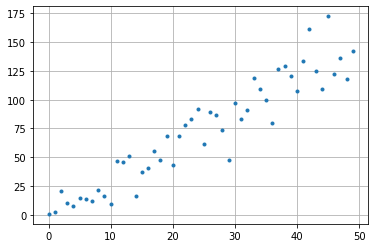

In [6]:
plt.plot(x,y,'.')
plt.grid()

##  Make a 2-Point Fit

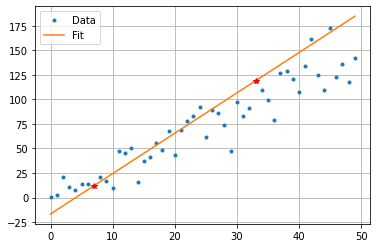

In [7]:
#
#  We will fit linear models:  y = a x + b.  Each model has 2 DoF (a,b) and requires 2 points to fit.
#  Given (x1,y1) and (x2,y2):
#     a = (y2-y1) / (x2-x1)
#     b = y1 - x1 * a
#
#  For example:
#
p1,p2 = 7,33
a = (y[p2]-y[p1]) / (x[p2]-x[p1])
b = y[p1] - x[p1] * a
plt.plot(x,y,'.',label='Data')
plt.plot(x,a*x+b,label='Fit')
plt.plot(x[p1],y[p1],'r*')
plt.plot(x[p2],y[p2],'r*')
plt.grid()
plt.legend()

Text(24.5, 142.36718882628728, 'n: 50  In: 44  Out: 6')

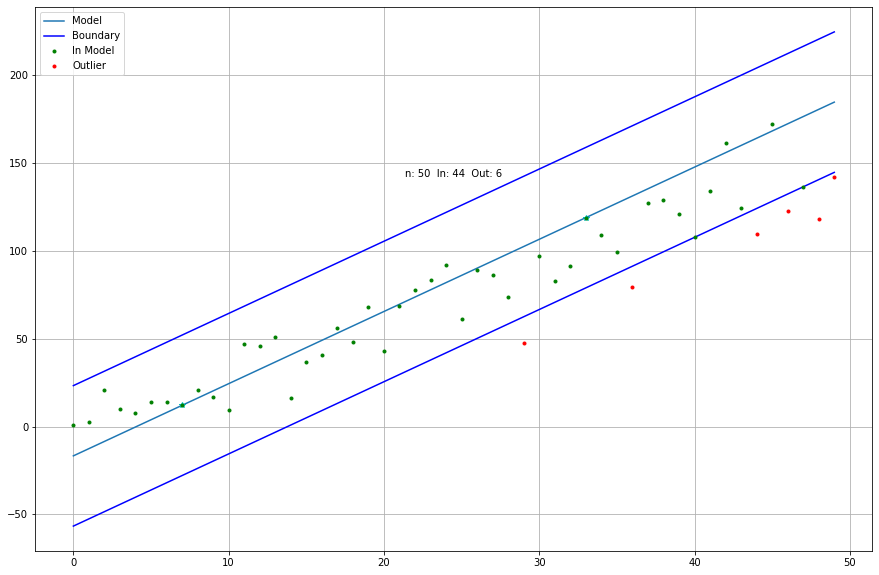

In [8]:
#
#  Classify points as in-model or outliers
#
mY = a * x + b  # Model Y
mE = y - mY     # Deviation from model
inModel = np.abs(mE) <= 2.0 * sigma
inN = inModel.sum()
outN = n - inN
#
#  Plot with Model Boundaries and In/Out Datapoints
#
plt.figure(figsize=(15,10))
plt.plot(x,a*x+b,label='Model')
plt.plot(x,a*x+b+2*sigma,'b',label='Boundary')
plt.plot(x,a*x+b-2*sigma,'b')
plt.plot(x[p1],y[p1],'c*')
plt.plot(x[p2],y[p2],'c*')
plt.plot(x[inModel],y[inModel],'g.',label='In Model')
plt.plot(x[~inModel],y[~inModel],'r.',label='Outlier')
plt.grid()
plt.legend()
plt.text(x[-1]/2,y[-1],'n: {}  In: {}  Out: {}'.format(n,inN,outN),ha='center')

## Define Functions for Iteration

In [9]:
#
#  We'll need to iterate these steps:
#   1) Randomly Select Points
#   2) Fit the model
#   3) Classify the data points
#  so let's make a function for it.
#  
def ransacStep(x:np.ndarray,y:np.ndarray,limit:float)->np.ndarray:
    """RANSAC Linear Model Step"""
    # Pick 2 points
    pts = np.random.choice(len(x),2,replace=False)
    
    # Make the model
    a = (y[pts[1]]-y[pts[0]]) / (x[pts[1]]-x[pts[0]])
    b = y[pts[0]] - x[pts[0]] * a
    
    # Classify the points - i.e. determine the consensus set.
    mY = a * x + b  # Model Y
    mE = y - mY     # Deviation from model
    inModel = np.abs(mE) <= limit
    
    return dict(x=x,y=y,limit=limit,a=a,b=b,pts=pts,consensus=inModel)

In [14]:
def ransacPlot(result):
    plt.figure(figsize=(15,10))
    x = result['x']
    y = result['y']
    a = result['a']
    b = result['b']
    pts = result['pts']
    limit = result['limit']
    inModel = result['consensus']
    
    plt.plot(x,a*x+b,label='Model')
    plt.plot(x,a*x+b+limit,'b',label='Boundary')
    plt.plot(x,a*x+b-limit,'b')
    plt.plot(x[pts[0]],y[pts[0]],'r*')
    plt.plot(x[pts[1]],y[pts[1]],'r*')
    plt.plot(x[inModel],y[inModel],'g.',label='In Model')
    plt.plot(x[~inModel],y[~inModel],'r.',label='Outlier')
    plt.grid()
    plt.legend()
    plt.title('RANSAC Result')
    plt.text(x[-1]/2,y[-1],'n: {}  In: {}  Out: {}'.format(len(x),inModel.sum(),len(x)-inModel.sum()),ha='center')

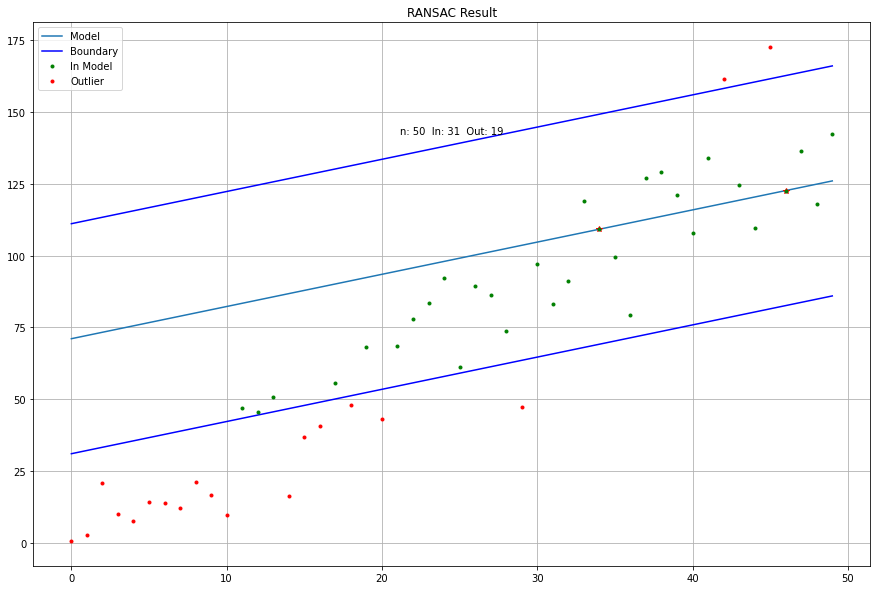

In [15]:
#
#  Try-out the function
#
result = ransacStep(x,y,2*sigma)
ransacPlot(result)

# RANSAC

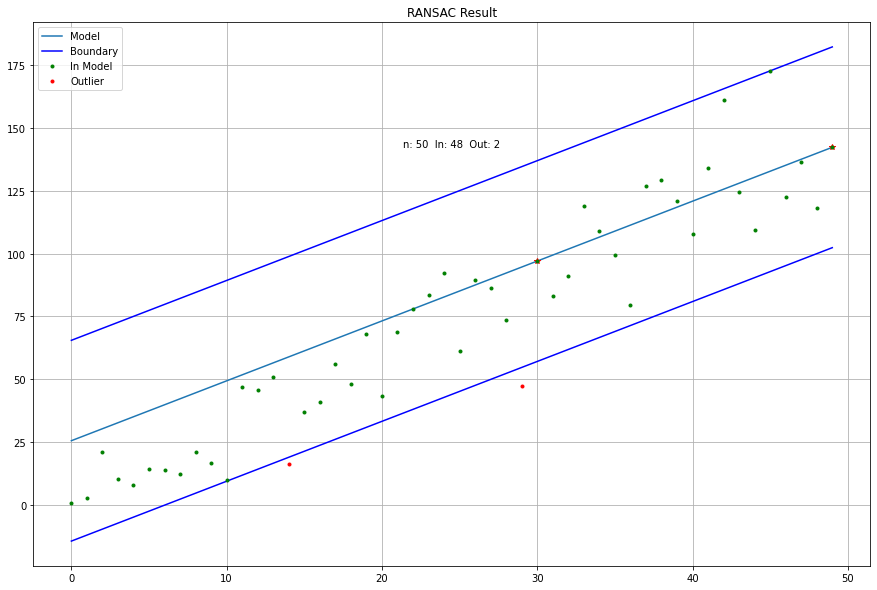

In [18]:
#
#  Ok - RANSAC - we repeat the iteration until the consensus set includes a threshold number of the samples
#
tol = 0.90
consensusCount = tol * n
while 1:
    result = ransacStep(x,y,2*sigma)
    if result['consensus'].sum() >= consensusCount:
        break
ransacPlot(result)

## Notes

1. The algorithm doesn't learn anything from a failed trial. Clustering methods, in contrast, incrementally 
improve the cluster centers and classification of points.